In [1]:
Sys.setenv(LANG="en")
library(scRNAseq)
library(batchelor)
library(scran)
library(scater)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

ERROR: Error: package or namespace load failed for ‘scRNAseq’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 0.4.12 is already loaded, but >= 1.0.0 is required


In [2]:
print("scRNA1 smartseq")

B1 <- read.csv("processed_mouse_Ileum/tangram/mapping_immunity/merge2PP_LP.csv",sep=",", header=TRUE, row.names=1)
#print(B1[1:5,1:5])
#B1 <- as.matrix(B1)
cat("nrow = ", nrow(B1), "ncol = ", ncol(B1), "\n");

#print("scRNA2 10x")
#B2 <- read.csv("GSM3828673_10X_GBM_IDHwt_processed_TPM.tsv",sep="\t", header=TRUE,row.names=1)
#B2 <- as.matrix(B2)
#cat("nrow = ", nrow(B2), "ncol = ", ncol(B2), "\n");

print("MERFISH 1")
M1 <- read.csv("processed_mouse_Ileum/tangram/mapping/ST_gene_by_cell.csv",sep=",", header=TRUE,row.names=1)
cat("nrow = ", nrow(M1), "ncol = ", ncol(M1), "\n");

#print("MERFISH 1")
#M2 <- read.csv("MERFISH_gene_by_cell_counts2.csv",sep=",", header=TRUE,row.names=1)
#cat("nrow = ", nrow(M2), "ncol = ", ncol(M2), "\n");


[1] "scRNA1 smartseq"
nrow =  19221 ncol =  58067 
[1] "MERFISH 1"
nrow =  241 ncol =  7416 


In [3]:
gene1 <- rownames(B1) 
gene2 <- rownames(M1) 
#gene3 <- rownames(M1) 
#gene4 <- rownames(M2) 

identical(rownames(B1), rownames(M1))

common_genes <- intersect(gene1, gene2)
#com2 <- intersect(gene3, gene4)


#common_genes <- intersect(com1, com2)
#Rewrite B1 and B2 with the common genes
pB1 <- B1[common_genes,]
pB2 <- M1[common_genes,]
#pB3 <- M1[common_genes,]
#pB4 <- M2[common_genes,]

nB1 <- cbind(pB1,pB2)
#nB2 <- cbind(pB3,pB4)
#common_genes

#identical(rownames(nB1), rownames(nB2))
dim(nB1)
#dim(nB2)

[1] FALSE

[1]   193 65483

In [4]:
sce1 <- SingleCellExperiment(list(counts=pB1))
sce2 <- SingleCellExperiment(list(counts=pB2))
#sce3 <- SingleCellExperiment(list(counts=pB3))
#sce4 <- SingleCellExperiment(list(counts=pB4))
sizeFactors(sce1) <- 2^rnorm(ncol(sce1))
sizeFactors(sce2) <- 2^rnorm(ncol(sce2))
#sizeFactors(sce3) <- 2^rnorm(ncol(sce3))
#sizeFactors(sce4) <- 2^rnorm(ncol(sce4))

In [5]:
sce1

class: SingleCellExperiment 
dim: 193 58067 
metadata(0):
assays(1): counts
rownames(193): Il17a Fzd7 ... Adra2a Adrb1
rowData names(0):
colnames(58067):
  Food.Allergy.PP_04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAGACCCACC.0
  Food.Allergy.PP_04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAGGCCCTTG.0
  ...
  Food.Allergy.LP_11292017_IgDnegSI_nonTBSI_v2_Ctrl_nonTB_TTTGTCAGTAGTGAAT.1
  Food.Allergy.LP_11292017_IgDnegSI_nonTBSI_v2_Ctrl_nonTB_TTTGTCAGTATCACCA.1
colData names(1): sizeFactor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [6]:
sce2

class: SingleCellExperiment 
dim: 193 7416 
metadata(0):
assays(1): counts
rownames(193): Il17a Fzd7 ... Adra2a Adrb1
rowData names(0):
colnames(7416): cell1 cell2 ... cell8176 cell8198
colData names(1): sizeFactor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [7]:
#combined <- cbind(sce1, sce2,sce3,sce4)
#batch <- rep(1:4, c(ncol(sce1), ncol(sce2),ncol(sce3),ncol(sce4)))
combined <- cbind(sce1, sce2)
batch <- rep(1:2, c(ncol(sce1), ncol(sce2)))
combined

class: SingleCellExperiment 
dim: 193 65483 
metadata(0):
assays(1): counts
rownames(193): Il17a Fzd7 ... Adra2a Adrb1
rowData names(0):
colnames(65483):
  Food.Allergy.PP_04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAGACCCACC.0
  Food.Allergy.PP_04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAGGCCCTTG.0
  ... cell8176 cell8198
colData names(1): sizeFactor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [8]:
combined <- applyMultiSCE(combined, batch=batch, FUN=multiBatchNorm)
combined

ERROR: Error in applyMultiSCE(combined, batch = batch, FUN = multiBatchNorm): could not find function "applyMultiSCE"


In [9]:
chosen.hvgs <- getTopHVGs(combined,n=2000)
chosen.hvgs

[1] "Slc51a"  "Slc5a1"  "Acta2"   "Clca3b"  "Cps1"    "Apob"    "Ms4a1"  
 [8] "Cd79a"   "Nkg7"    "Nlrp6"   "Klk1"    "Mzb1"    "Neat1"   "Cd8b1"  
[15] "Gzmb"    "Txndc5"  "Cd3e"    "Cd3d"    "Mptx2"   "Fcer1a"  "Ighd"   
[22] "Ffar2"   "Ccr7"    "Maoa"    "Stmn1"   "Sdc1"    "C1qb"    "Icos"   
[29] "Il4"     "C1qc"    "Kit"     "H2-Eb1"  "Il7r"    "Trdc"    "Cd8a"   
[36] "Ccl9"    "Tpsb2"   "Cd34"    "Fzd5"    "Mki67"   "Ltb4r1"  "Foxp3"  
[43] "Ifng"    "Ptger2"  "Slc12a2" "Tbx21"   "Avil"    "Tm4sf4"  "Chrm2"  
[50] "Trpm5"   "Thy1"    "Adra1b"  "Adgrf5"  "Il5"     "S1pr1"   "Glp2r"  
[57] "Il10"    "Sox10"   "Gp2"     "Isl1"    "S1pr5"

In [10]:
f.out <- fastMNN(combined,batch=batch,subset.row=chosen.hvgs)

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."
Warning message in (function (query, X, clust_centers, clust_info, dtype, nn, get_index, :
"detected tied distances to neighbors, see ?'BiocNeighbors-ties'"
Warning message in (function (query, X, clust_centers, clust_info, dtype, nn, get_index, :
"detected tied distances to neighbors, see ?'BiocNeighbors-ties'"
Warning message in (function (query, X, clust_centers, clust_info, dtype, nn, get_index, :
"detected tied distances to neighbors, see ?'BiocNeighbors-ties'"


In [14]:
#The corrected matrix in the reducedDims() contains the low-dimensional corrected 
#coordinates for all cells, which we will use in place of the PCs in our downstream 
#analyses.
dim(reducedDim(f.out, "corrected"))
str(reducedDim(f.out, "corrected"))
#rle(f.out$batch)
dim(f.out)

#A reconstructed matrix in the assays() contains the corrected expression values for 
#each gene in each cell, obtained by projecting the low-dimensional coordinates in corrected 
#back into gene expression space. We do not recommend using this for anything other than 
#visualization

assay(f.out, "reconstructed")

[1] 14632    50

 num [1:14632, 1:50] 0.00844 -0.28827 -0.12094 -0.20312 -0.19357 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:14632] "B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal" "B1_AAACCGTGCCAAGT_Tuft" "B1_AAACGCACAGCCTA_Goblet" "B1_AAACGCACCAGATC_Endocrine" ...
  ..$ : NULL


[1]    56 14632

<56 x 14632> matrix of class LowRankMatrix and type "double":
       B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal ...
 Acta2                                  -0.06964135   .
  Apob                                  -0.10669514   .
Slc51a                                   0.35324151   .
 Mptx2                                   0.26708726   .
Tm4sf4                                  -0.04982810   .
   ...                                            .   .
  Sell                                -0.0003472457   .
  Rgs4                                -0.0045588349   .
Gpr119                                -0.0002922995   .
 Galr1                                -0.0003215091   .
  Il7r                                -0.0034655438   .
                                           cell8176
 Acta2                                  -0.16332149
  Apob                                   0.17109659
Slc51a                                   0.13319882
 Mptx2                                  -0.02477302
Tm4sf4

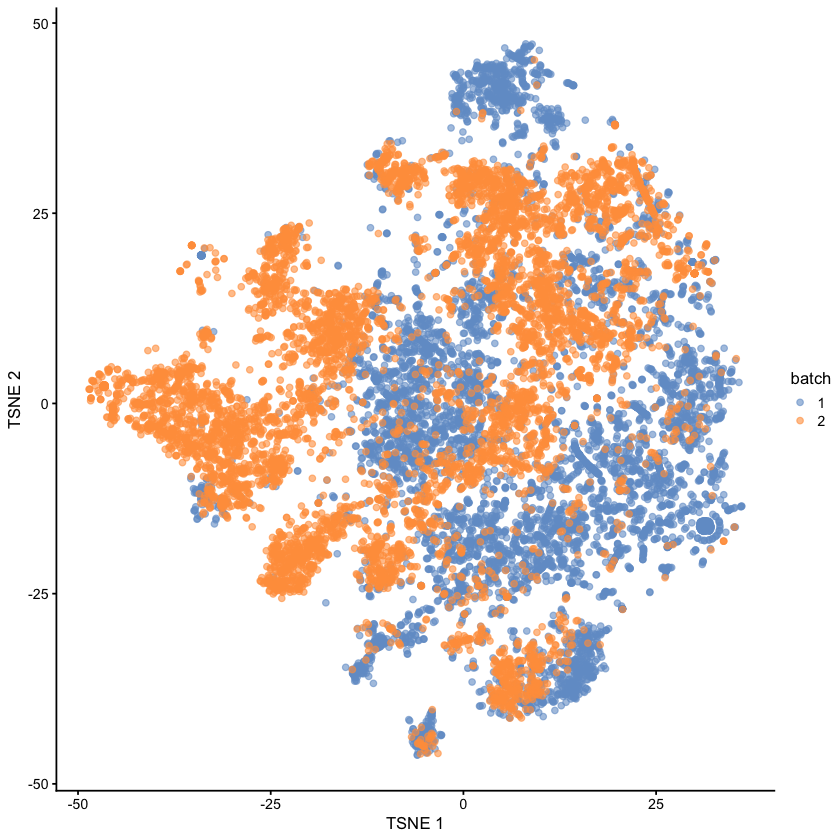

In [15]:
set.seed(105)
out <- runTSNE(f.out, dimred="corrected")
plotTSNE(out, colour_by="batch")

In [16]:
snn.gr <- buildSNNGraph(f.out, use.dimred="corrected")
clusters.mnn <- igraph::cluster_walktrap(snn.gr)$membership
tab.mnn <- table(Cluster=clusters.mnn, Batch=f.out$batch)
tab.mnn
write.csv(cbind(batch,clusters.mnn),"MNN_batch_correction_cluster_output.csv",quote=FALSE,row.names=TRUE)

Warning message in (function (to_check, X, clust_centers, clust_info, dtype, nn, :
"detected tied distances to neighbors, see ?'BiocNeighbors-ties'"


       Batch
Cluster    1    2
     1   715 1195
     2    11   62
     3    15  636
     4  1468 1047
     5   427    4
     6    50    1
     7    80  821
     8     0  136
     9     0  344
     10  987  142
     11   54    7
     12   33  191
     13 1259  346
     14   43  383
     15    2  422
     16   37    0
     17   93   25
     18   52  514
     19   43    2
     20  139   21
     21   12   30
     22  298    2
     23   51    1
     24  177  307
     25   27    0
     26   24    0
     27  127   25
     28    0   84
     29   17  148
     30   30    1
     31   25    0
     32   31    0
     33    4   53
     34   11  141
     35   16    8
     36   12   20
     37   19    5
     38   34    0
     39    0   29
     40   27    6
     41   17   25
     42   21    0
     43   22    0
     44   23    0
     45   24    0
     46    0   49
     47   19   66
     48    3   42
     49   19    0
     50   18    0
     51   40    2
     52   71    2
     53   26    0
     54   21   

In [ ]:
cor.exp <- assay(f.out)[1,]
hist(cor.exp, xlab="Corrected expression for gene 1", col="grey80") 

In [71]:
comb <- correctExperiments(combined,batch=batch, PARAM=NoCorrectParam())
comb

class: SingleCellExperiment 
dim: 114 43132 
metadata(0):
assays(3): merged counts logcounts
rownames(114): ABCA1 AIF1L ... VSTM2A ZFHX3
rowData names(0):
colnames(43132): MGH101.P1.A04 MGH101.P1.A05 ... cell9297 cell9298
colData names(2): batch sizeFactor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


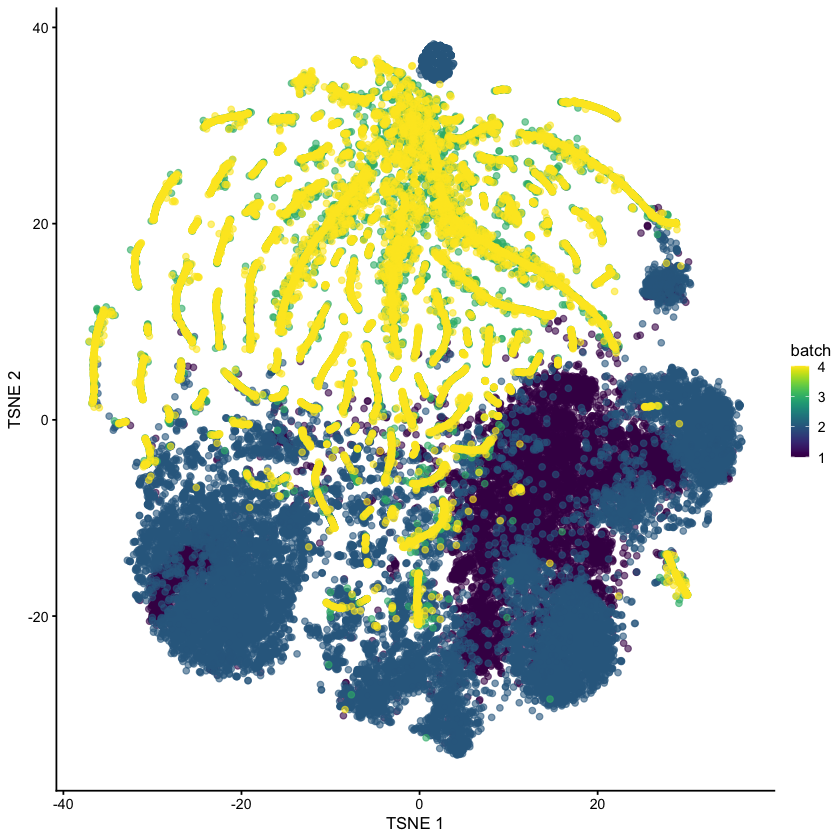

In [72]:
set.seed(100)
comb <- runPCA(comb, subset_row=chosen.hvgs)
comb <- runTSNE(comb, dimred="PCA")
#comb <- runUMAP(comb, dimred="PCA")
plotTSNE(comb, colour_by="batch")

In [24]:
gene1 <- rownames(B1) 
gene2 <- rownames(B2) 

common_genes <- intersect(gene1, gene2)
#Rewrite B1 and B2 with the common genes
B1 <- B1[common_genes,]
B2 <- B2[common_genes,]

#interesting tutorial 
#https://swcarpentry.github.io/r-novice-inflammation/10-supp-addressing-data/

#colnames(B1)
uniqueGeneName <- unique(merge(gene1,gene2,by=1)[,-1])

cat("nr1",length(gene1),length(gene2))

index_of_gene1 <- 0
index_of_gene2 <- 0 

count1=0
count2=0
for(i in 1:length(gene1)) 
{
  for(j in 1:length(gene2))
      {
          if(gene1[i]==gene2[j])
              {
              index_of_gene1[count1]=i
              index_of_gene2[count2]=j
              count1=count1+1
              count2=count2+1
              }
  }
}

cat("nr2",length(index_of_gene1),length(index_of_gene2))

nB1=B1[index_of_gene1,]
nB2=B2[index_of_gene2,]

nr1 8951 8866nr2 8400 8400